In [1]:
"""Run this cell if in new enviroment without slam installed"""
# ! pip install git+https://github.com/Pitt-JonesLab/slam_decomposition
# #write to config file an empty directory (monkey patching for sake of portability)
# f = open("config.py", "w")
# f.write('srcpath = "content/"')
# f.close()

'Run this cell if in new enviroment without slam installed'

#### Objective construct basic examples of pd gates trajectories in order to understand the geometry

In [2]:
%matplotlib widget
from slam.utils.pd_playground import ParallelDrivenGateWidget
import numpy as np
from slam.utils.visualize import coordinate_2dlist_weyl
from ipywidgets import interact

In [3]:
#optimize parameter vectors to go to SWAP gate
from qiskit.circuit.library import SwapGate
from weylchamber import c1c2c3
target = SwapGate().to_matrix()
# target_coords = c1c2c3(target)

In [4]:
pdgw = ParallelDrivenGateWidget(N = 15, gc = np.pi/2, gg = 0, phase_a=np.pi, phase_b=0,phase_c=0, phase_g = 0)

In [5]:
# # use widget to change parameters
# bounds = (-2*np.pi, 2*np.pi)
# interact(pdgw.widget_wrap, q0=bounds, q1=bounds);

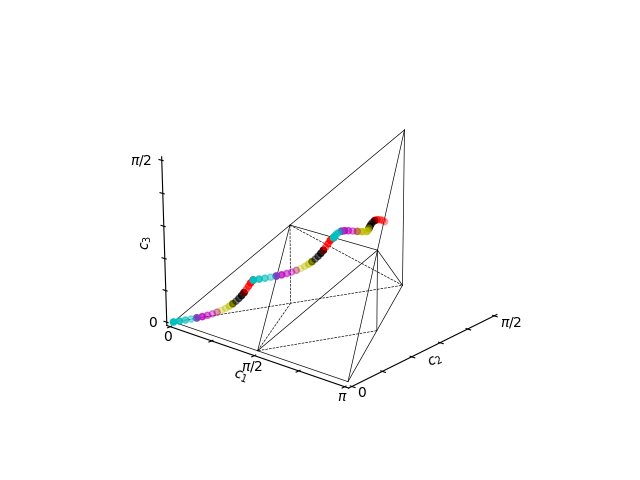

In [6]:
# # use widget to change parameters
pdgw = ParallelDrivenGateWidget(N = 10, gc = np.pi/2, gg = 0, phase_a=0, phase_b=0,phase_c=0, phase_g = 0)
pdgw2 = ParallelDrivenGateWidget(N = 5, gc = np.pi/2, gg = 0, phase_a=np.pi/2, phase_b=-np.pi/8, phase_c=0, phase_g = 0)
pdgw3 = pdgw + pdgw2
bounds = (-2*np.pi, 2*np.pi)
gx, gy = list(np.ones(10)*np.pi)+list(np.ones(5)*2*np.pi), list(np.ones(10)*np.pi)+list(np.ones(5)*np.pi/2)

pdgw3.prepare_parameters_nonuniform(gx,gy)
pdgw3.iterate_time()
coordinate_2dlist_weyl(*pdgw3.coordinate_list);

Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 13
         Function evaluations: 103


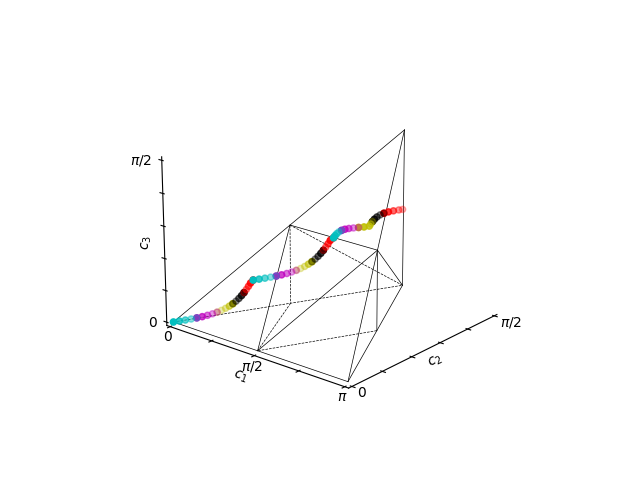

In [7]:
#to optimize for SWAP
# # use widget to change parameters
from slam.cost_function import WeylEuclideanCost, MakhlinFunctionalCost
from scipy.optimize import minimize

#ansatz includes solution for midpoint, with 5 remaining parameters
pdgw = ParallelDrivenGateWidget(N = 10, gc = np.pi/2, gg = 0, phase_a=0, phase_b=0,phase_c=0, phase_g = 0)
pdgw2 = ParallelDrivenGateWidget(N = 5, gc = np.pi/2, gg = 0, phase_a=np.pi/2, phase_b=0,phase_c=0, phase_g = 0)
pdgw3 = pdgw + pdgw2
bounds = (-2*np.pi, 2*np.pi)
gx, gy = list(np.ones(10)*np.pi)+list(np.ones(5)*np.pi), list(np.ones(10)*-np.pi)+list(np.ones(5)*0)

cost_f = MakhlinFunctionalCost()
# cost_f = WeylEuclideanCost()
def cost_function(p):
    pdgw2 = ParallelDrivenGateWidget(N = 5, gc = np.pi/2, gg = 0, phase_a=p[0], phase_b=p[1],phase_c=p[2], phase_g = p[3])
    pdgw3 = pdgw + pdgw2
    # gx = list(np.ones(10)*np.pi) + list(p[:len(p)//2])
    # gy = list(np.ones(10)*np.pi) + list(p[len(p)//2:])
    gx = list (np.ones(10)*np.pi) + list(p[4] * np.ones(5))
    gy = list (np.ones(10)*np.pi) + list(p[5] * np.ones(5))
    pdgw3.prepare_parameters_nonuniform(gx,gy)
    # pdgw3.iterate_time()
    f = pdgw.solve_end()
    current_cost = cost_f.unitary_fidelity(target, f)
    # print(current_cost)
    return current_cost

#initial guess
# p0 = list(np.ones(5)*np.pi/2) + list(np.ones(5)*np.pi/2) # guess for every parameter
p0 = [np.pi/2, 0, 0 ,0, 2*np.pi, 0] # one guess for every parameter
ret = minimize(cost_function, p0, method='Nelder-Mead', options={'disp': True})

# display results 
# gx = list(np.ones(10)*np.pi) + list(res.x[:len(res.x)//2])
# gy = list(np.ones(10)*np.pi) + list(res.x[len(res.x)//2:])
gx = list (np.ones(10)*np.pi) + list(ret.x[4] * np.ones(5))
gy = list (np.ones(10)*np.pi) + list(ret.x[5] * np.ones(5))
pdgw2 = ParallelDrivenGateWidget(N = 5, gc = np.pi/2, gg = 0, phase_a=ret.x[0], phase_b=ret.x[1],phase_c=ret.x[2], phase_g = ret.x[3])
pdgw3 = pdgw + pdgw2
pdgw3.prepare_parameters_nonuniform(gx,gy)
pdgw3.iterate_time()
coordinate_2dlist_weyl(*pdgw3.coordinate_list);

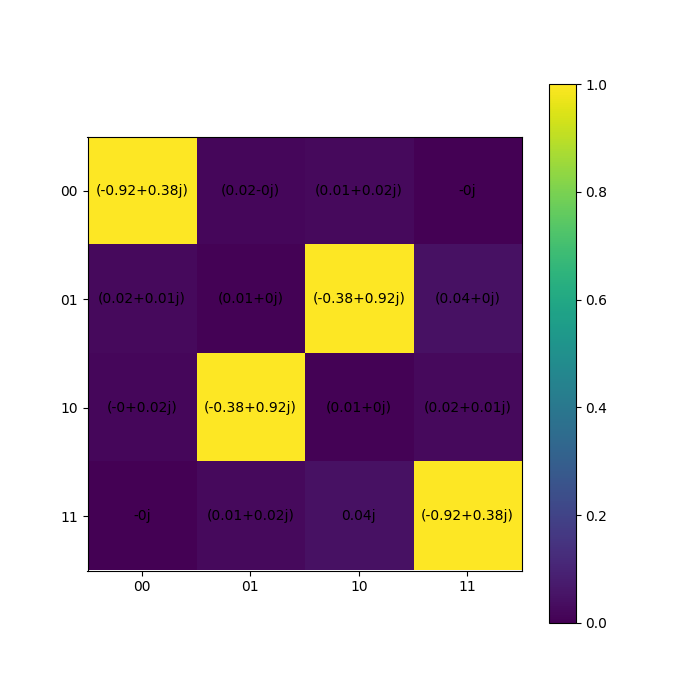

In [8]:
from slam.utils.visualize import plotMatrix
plotMatrix(pdgw3.final_unitary);

In [9]:
# from scipy.optimize import minimize
# from slam.cost_function import SquareCost
# from tqdm import tqdm

# pdgw = ParallelDrivenGateWidget(N=15, gc = 3*np.pi/4, gg = 0, phase_c = 0, phase_g = 0)
# pdgw.prepare_parameters_nonuniform(gx,gy)
# # define cost function as the distance between the target and each of the end segement points
# cost = SquareCost()
# gx, gy = list(np.ones(10)*np.pi)+list(np.zeros(5)), list(np.ones(10)*np.pi)+list(np.zeros(5))

# for n_iter in tqdm(range(1, 2)):
#     pdgw = ParallelDrivenGateWidget(N=15, gc = 3*np.pi/4, gg = 0, phase_c = 0, phase_g = 0)
#     def cost_function(p):
#         gx = list(np.ones(10)*np.pi)+list(p[:len(p)//2])
#         gy = list(np.ones(10)*np.pi)+list(p[len(p)//2:])
#         pdgw.prepare_parameters_nonuniform(gx,gy)
#         # pdgw.iterate_time()
#         # f = cost.unitary_fidelity(target, pdgw.final_unitary)
#         f = cost.unitary_fidelity(target, pdgw.solve_end())
#         # print(f)
#         return f

#     # optimize
#     res = minimize(cost_function, list(np.zeros(10)), method='Nelder-Mead')
#     # print res final function value
#     print(res.fun)

# # print(res.x)
# gx = list(np.ones(10)*np.pi)+list(res.x[:len(res.x)//2])
# gy = list(np.ones(10)*np.pi)+list(res.x[len(res.x)//2:])
# print(gx, gy)
# pdgw.prepare_parameters_nonuniform(gx,gy)
# pdgw.iterate_time()
# coordinate_2dlist_weyl(*pdgw.coordinate_list);

In [ ]:
#want to check for changing phase, can the final unitary ever be off bottom plane
# twirl phase variables 1000 iterations
#NOTE seems impossible
from tqdm import tqdm
from itertools import permutations
from slam.cost_function import WeylEuclideanCost, SquareReducedCost, MakhlinFunctionalCost, SquareReducedBellCost
from slam.utils.pd_playground import ParallelDrivenGateWidget
from qiskit.circuit.library import SwapGate
from weylchamber import c1c2c3
target = SwapGate().to_matrix()

# cost_f = WeylEuclideanCost()
cost_f = SquareReducedCost()
# cost_f = SquareReducedBellCost()
best_cost = None
pdgw = ParallelDrivenGateWidget(N = 10, gc = np.pi/2, gg = 0, phase_a=0, phase_b=0,phase_c=0, phase_g = 0)
# for a in tqdm(list(permutations(np.arange(-2*np.pi, 2*np.pi+np.pi/8, np.pi/2), r=6))):

def cost_function(a):
    # # use widget to change parameters
    pdgw2 = ParallelDrivenGateWidget(N = 3, gc = np.pi/2, gg = 0, phase_a=a[0], phase_b=a[1], phase_c=a[2], phase_g = a[3])
    pdgw3 = ParallelDrivenGateWidget(N = 2, gc = np.pi/2, gg = 0, phase_a=a[4], phase_b=a[5], phase_c=a[6], phase_g = a[7])
    pdgw4 = pdgw + pdgw2 + pdgw3
    gx, gy = list(np.ones(10)*np.pi)+list(np.ones(3)*a[8])+list(np.ones(2)*a[9]), list(np.ones(10)*np.pi)+list(np.ones(3)*a[10])+list(np.ones(2)*a[11])
    pdgw4.prepare_parameters_nonuniform(gx,gy)
    # pdgw3.iterate_time()
    f = pdgw4.solve_end()
     
    # want to track minimum distance to target
    current_cost = cost_f.unitary_fidelity(target, f)
    return current_cost
    # if best_cost is None or current_cost <= best_cost:
    #     best_cost = current_cost
    #     best_a = a
    #     print(best_cost, best_a)

# optimize
# try i times with random initial parameters
from scipy.optimize import minimize
i = 5
for _ in tqdm(range(i)):
    res = minimize(cost_function, list(np.random.uniform(-2*np.pi, 2*np.pi, size=12)), method='Nelder-Mead', options={'disp': True})
    if best_cost is None or res.fun < best_cost:
        best_cost = res.fun
        best_a = res.x
        print(best_cost, best_a)

In [ ]:
# 0.013629539844115302 [ 4.87911870e+00 -4.87814684e+00 -5.91729395e+00  4.54059294e+02
#  -3.34409934e+00  2.00213460e-01 -5.69159762e+00  4.55756897e+02
#  -3.33791862e+00 -3.28845361e+00  3.33429678e+00 -3.27741811e+00]
# #

In [11]:
# best_a = [ 1.40369633, -1.40379037, -6.64622192,  3.2541767,   3.34337449, -0.20441138,
#   5.68834068,  2.26490991,  3.3392069,   3.28468904, -3.34046558,  3.2873195 ]

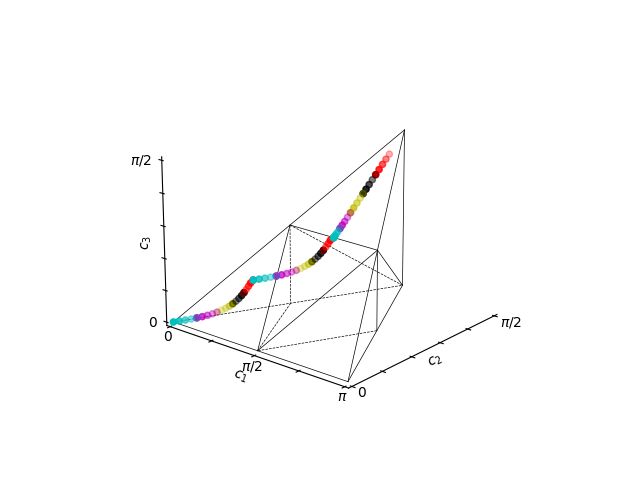

In [12]:
# plot results
from slam.utils.visualize import coordinate_2dlist_weyl
a = best_a
pdgw = ParallelDrivenGateWidget(N = 10, gc = np.pi/2, gg = 0, phase_a=0, phase_b=0,phase_c=0, phase_g = 0)  
pdgw2 = ParallelDrivenGateWidget(N = 3, gc = np.pi/2, gg = 0, phase_a=a[0], phase_b=a[1], phase_c=a[2], phase_g = a[3])
pdgw3 = ParallelDrivenGateWidget(N = 2, gc = np.pi/2, gg = 0, phase_a=a[4], phase_b=a[5], phase_c=a[6], phase_g = a[7])
pdgw4 = pdgw + pdgw2 + pdgw3
gx, gy = list(np.ones(10)*np.pi)+list(np.ones(3)*a[8])+list(np.ones(2)*a[9]), list(np.ones(10)*np.pi)+list(np.ones(3)*a[10])+list(np.ones(2)*a[11])
pdgw4.prepare_parameters_nonuniform(gx,gy)
pdgw4.iterate_time(R=5)
coordinate_2dlist_weyl(*pdgw4.coordinate_list);

0.7039754532349288


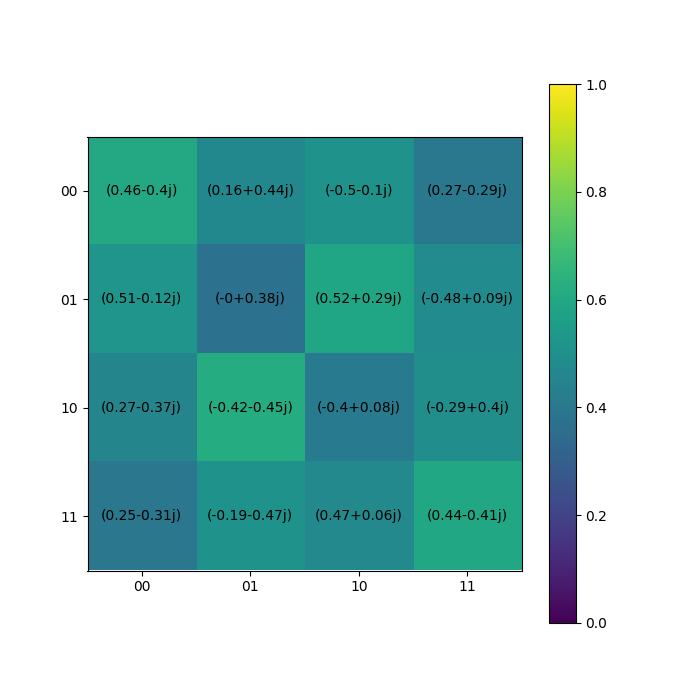

In [14]:
# plot final unitary
from slam.utils.visualize import plotMatrix
from slam.cost_function import SquareCost
c = SquareCost()
print(c.unitary_fidelity(target, pdgw4.final_unitary))
c1c2c3(pdgw4.final_unitary)
plotMatrix(pdgw4.final_unitary);